In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import numpy as np

if not os.path.isfile('car_price.csv'):
    !wget -O 'car_price.csv' "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [2]:
columns = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]

In [3]:
df = pd.read_csv("car_price.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df = df[columns].copy()
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df['above_average'] = (df.msrp >= df.msrp.mean()).astype(int)
del df['msrp']
df['above_average'].value_counts()

0    8645
1    3269
Name: above_average, dtype: int64

In [7]:
columns = list(df.columns)

In [8]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical.remove('above_average')
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [10]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
above_average        0
dtype: int64

## split data

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Question 1: ROC AUC feature importance
which hs the highest auc: *engine_hp*

In [12]:
for col in numerical:
    auc_score = roc_auc_score(y_train, df_train[col])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[col])
    print("%16s: %.6f" % (col, auc_score))

            year: 0.691669
       engine_hp: 0.913665
engine_cylinders: 0.763268
     highway_mpg: 0.628417
        city_mpg: 0.668646


## Training the model

In [13]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
6996,Mitsubishi,Montero,2005,215.0,6.0,AUTOMATIC,4dr SUV,17,13
2951,Toyota,Corolla,2017,132.0,4.0,AUTOMATIC,Sedan,36,28
9405,GMC,Sierra 1500HD,2006,300.0,8.0,AUTOMATIC,Crew Cab Pickup,18,13
9845,Kia,Sorento,2017,290.0,6.0,AUTOMATIC,4dr SUV,25,18
6446,Subaru,Loyale,1993,90.0,4.0,MANUAL,Wagon,28,22
...,...,...,...,...,...,...,...,...,...
4436,Chevrolet,Express,2015,285.0,8.0,AUTOMATIC,Passenger Van,17,11
11651,Hyundai,XG300,2001,192.0,6.0,AUTOMATIC,Sedan,25,17
4406,Ford,Explorer,2017,365.0,6.0,AUTOMATIC,4dr SUV,22,16
374,Mazda,3,2015,184.0,4.0,MANUAL,4dr Hatchback,35,26


In [14]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.92754778, 0.50957916, 0.01031423, ..., 0.00173931, 0.00429678,
       0.85582737])

## whatts the auc
0.978

In [15]:
round(roc_auc_score(y_val, y_pred),3)

0.971

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

1. 0.28
1. 0.48
1. 0.68
1. 0.88

0.48

In [16]:
def tpr_fpr_pr_dataframe(y_val, y_pred):
    threshold = np.linspace(0,1,101)
    scores = []
    for t in threshold:
        actual_postive = y_val == 1
        actual_negative = y_val == 0


        predicted_positive = y_pred >= t
        predicted_negative = y_pred < t

        tn = (predicted_negative & actual_negative).sum()
        tp = (predicted_positive & actual_postive).sum()
        fn = (predicted_negative & actual_postive).sum()
        fp = (predicted_positive & actual_negative).sum()

        fpr = fp / (tn + fp)
        tpr = tp / (tp + fn)
        
        precision = tp / (fp + tp)
        recall = tp / (tp + fn)
        
        f1 = 2 * ((precision * recall)/(precision + recall))

        scores.append((t, tn, tp, fn, fp, fpr, tpr, precision, recall, f1))

    df_roc = pd.DataFrame(scores, columns=['threshold', 'tn', 'tp', 'fn', 'fp', 'fpr', 'tpr', 'p', 'r', 'f1'])
    return df_roc

df_roc = tpr_fpr_pr_dataframe(y_val, y_pred)
df_roc[::10]

/tmp/ipykernel_28095/547432799.py:20: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (fp + tp)


,threshold,tn,tp,fn,fp,fpr,tpr,p,r,f1
0,0.0,0,665,0,1718,1.000000,1.000000,0.279060,1.000000,0.436352
10,0.1,1355,651,14,363,0.211292,0.978947,0.642012,0.978947,0.775462
20,0.2,1511,625,40,207,0.120489,0.939850,0.751202,0.939850,0.835003
30,0.3,1556,601,64,162,0.094296,0.903759,0.787680,0.903759,0.841737
40,0.4,1593,575,90,125,0.072759,0.864662,0.821429,0.864662,0.842491
50,0.5,1637,546,119,81,0.047148,0.821053,0.870813,0.821053,0.845201
60,0.6,1666,499,166,52,0.030268,0.750376,0.905626,0.750376,0.820724
70,0.7,1684,473,192,34,0.019790,0.711278,0.932939,0.711278,0.807167
80,0.8,1705,401,264,13,0.007567,0.603008,0.968599,0.603008,0.743281
90,0.9,1714,313,352,4,0.002328,0.470677,0.987382,0.470677,0.637475


In [17]:
df_roc[df_roc.p == df_roc.r].threshold

Series([], Name: threshold, dtype: float64)

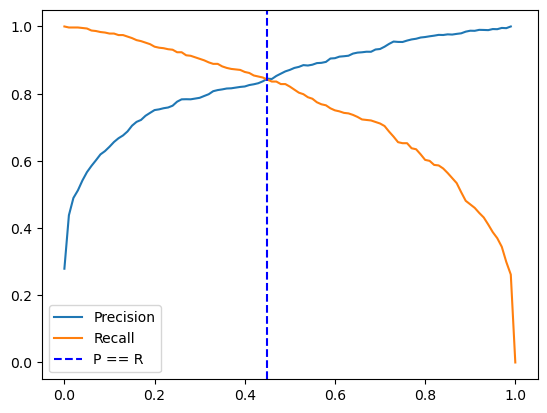

In [22]:
import matplotlib.pyplot as plt

plt.plot(df_roc.threshold, df_roc.p, label="Precision")
plt.plot(df_roc.threshold, df_roc.r, label="Recall")
plt.axvline(x = 0.45, color = 'b', label = 'P == R', linestyle="--")
plt.legend()
plt.show()

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 f1 = 2 x (PR)/(P+R)

Where 
 is precision and 
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal? (0.37)

In [19]:
df_roc[df_roc.f1 == df_roc.f1.max()]

,threshold,tn,tp,fn,fp,fpr,tpr,p,r,f1
34,0.34,1580,591,74,138,0.080326,0.888722,0.8107,0.888722,0.84792


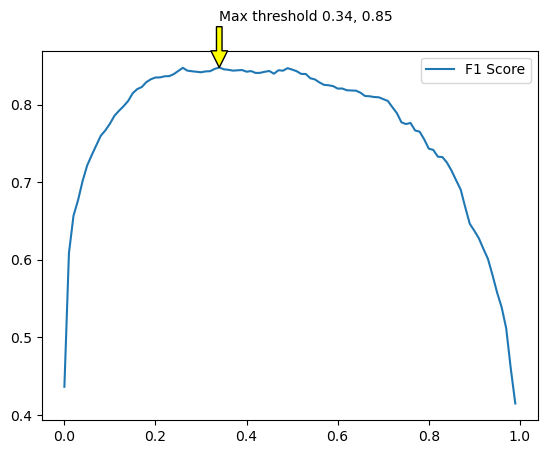

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(df_roc.threshold, df_roc.f1, label="F1 Score")
# plt.axvline(x = 0.47, color = 'b', label = 'P == R', linestyle="--")

# maxpoints
xmax, ymax = df_roc[df_roc.f1 == df_roc.f1.max()].threshold.values[0], df_roc[df_roc.f1 == df_roc.f1.max()].f1.values[0]
xmax, ymax

ax.annotate('Max threshold {:.2f}, {:.2f}'.format(xmax, ymax), xy=(xmax, ymax), xytext=(xmax, ymax + 0.06), arrowprops=dict(facecolor='yellow'),)
plt.legend()
plt.show()